**Carga de Dataset**

In [1]:
#Importe de librerias Para EDA
from sklearn.impute import SimpleImputer
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
#Carga de DataSet
df = pd.read_csv("./Titanic-Dataset.csv")


<h1>Analisis Exploratorio de Datos<h1>

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3>Informacion General del Dataset<h3>

In [4]:

#Informacion General del DataSet

print("Numero de Filas y Columnas",df.shape)


#Informacion General de los datos
print(df.info())



Numero de Filas y Columnas (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


**Descripcion General de los Datos**

Encontramos que el DataSet cuenta con alrededor de ***891*** registros y ***12*** Columnas.

<h3>Diccionario De Data<h3>

In [5]:
#Estadisticas Descriptivas
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3>Verificar Valores Nulos<h3>

In [6]:
#verificar Valores Nulos
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**NOTA**:Existen varios campos con valores Faltantes, tanto en Datos categoricos, como en datos numericos.

<h3>Deteccion de Columnas Numericas con Datos Faltantes<h3>

In [7]:
# Identificar columnas numéricas
columnas_numericas = df.select_dtypes(include=['number'])

# Verificar cuáles de las columnas numéricas tienen valores nulos
columnas_con_nulos_numericos = columnas_numericas.columns[columnas_numericas.isnull().sum() > 0]

# Mostrar las columnas numéricas que tienen valores nulos
print(columnas_con_nulos_numericos)


Index(['Age'], dtype='object')


**Imputacion Columnas Numericas faltantes**


In [8]:
#Segun las columnas con valores nulos,vamos a imputarlos por la mediana usando SimpleImputer

imputacion_mediana=SimpleImputer(strategy="median")

for col in columnas_con_nulos_numericos:
    columna=df[[col]]
    df[col]=imputacion_mediana.fit_transform(columna)

#Comprobamos que hayan desaparecido los valores nulos en las columnas numericas    
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<h3>Deteccion de Columnas con Datos Categoricos Faltantes<h3>


In [9]:
#  Identificar columnas con datos categoricos
columnas_categoricas = df.select_dtypes(include=['object'])

#  Verificar cuáles de las columnas categoricas tienen valores nulos
columnas_con_nulos_categoricos = columnas_categoricas.columns[columnas_categoricas.isnull().sum() > 0]

# Mostrar las columnas categocias que tienen valores nulos
print(columnas_con_nulos_categoricos)

Index(['Cabin', 'Embarked'], dtype='object')


<h4>Para El desarrollo de este ejercicio no contaremos con Cabin o Embarked pues consideramos que existen otras caracteristicas mas relevantes para la aplicacion del modelo de regresion Lineal. <h4>

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3>Datos Atipicos<h3>

In [11]:
# Función para detectar valores atípicos Extremos Usando rango Intercualtilico

def detectar_atipicos(data):
    Q1 = data.quantile(0.25)  # Primer cuartil
    Q3 = data.quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    limite_inferior = Q1 - 3 * IQR  # Límite inferior
    limite_superior = Q3 + 3 * IQR  # Límite superior
    return data[(data < limite_inferior) | (data > limite_superior)]

#  Aplicar la función a cada columna numérica y guardar resultados
valores_atipicos = {}

#Se detectan los datos atipicos y se guardan
for col in columnas_numericas:
    if col!="Pclass":
        atipicos = detectar_atipicos(df[col])
        valores_atipicos[col] = atipicos


In [12]:
# Se crea conjunto para almacenar los índices de todas las filas con valores atípicos, de estructura
indices_atipicos = set()

# Recopilar los índices de las filas atípicas
for col,atipicos in valores_atipicos.items():
    indices_atipicos.update(atipicos.index)
    

# Eliminar las filas atípicas usando sus índices
df.drop(indices_atipicos, inplace=True, errors='ignore')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 652 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  652 non-null    int64  
 1   Survived     652 non-null    int64  
 2   Pclass       652 non-null    int64  
 3   Name         652 non-null    object 
 4   Sex          652 non-null    object 
 5   Age          652 non-null    float64
 6   SibSp        652 non-null    int64  
 7   Parch        652 non-null    int64  
 8   Ticket       652 non-null    object 
 9   Fare         652 non-null    float64
 10  Cabin        124 non-null    object 
 11  Embarked     650 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
None


In [13]:
#numero  de valores atipicos eliminados
print(f"El numero de Valores Atipicos Eliminados es {len(indices_atipicos)}")

El numero de Valores Atipicos Eliminados es 239


<h2>Analisis Univariado<h2>

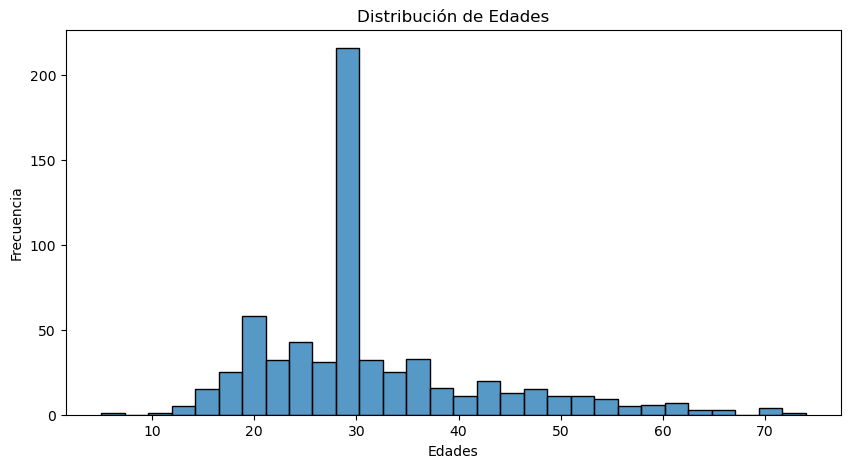

In [14]:
#Analisis de Edad
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=30)
plt.title('Distribución de Edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.show()


**Observacion de las Edades**: La distribucion de las Edades indica que la gran mayoria de pasajeros estaban en los 30 años.

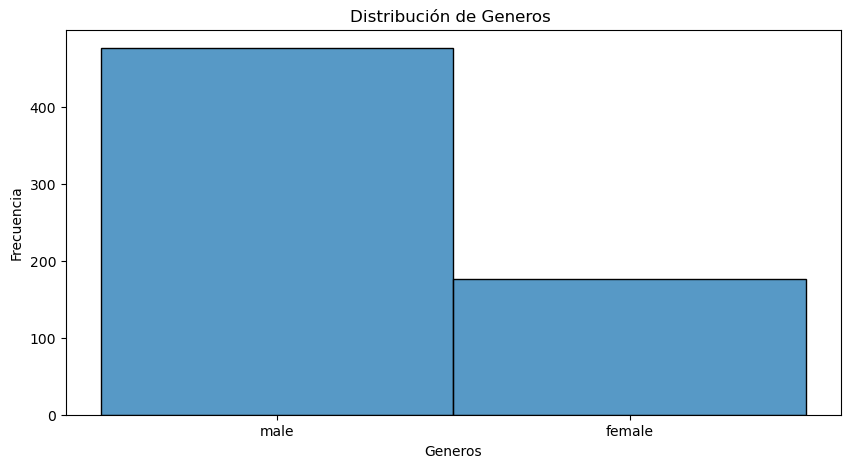

In [15]:
#Analisis de los Generos de los pasajeros
plt.figure(figsize=(10,5))
sns.histplot(df['Sex'], bins=30)
plt.title('Distribución de Generos ')
plt.xlabel('Generos')
plt.ylabel('Frecuencia')
plt.show()


**Observacion de las Generos**: La distribucion de las Generos de los pasajeros indica que la gran mayoria de pasajeros eran mas hombres que mujeres

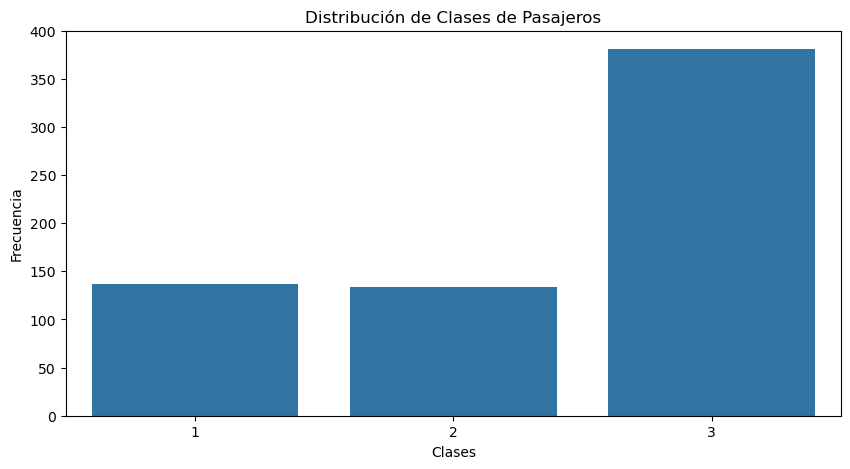

In [16]:
#Analisis de las clases de los pasajeros
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', data=df)
plt.title('Distribución de Clases de Pasajeros')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.show()

**Observacion de las Clases de los Pasajeros**: La distribucion de las clases de los pasajeros indica que la gran mayoria de pasajeros pertenecian a la 3 clase del barco. La menos solvente economicamente y que a su vez se hospedaban en la parte baja del la embarcacion.

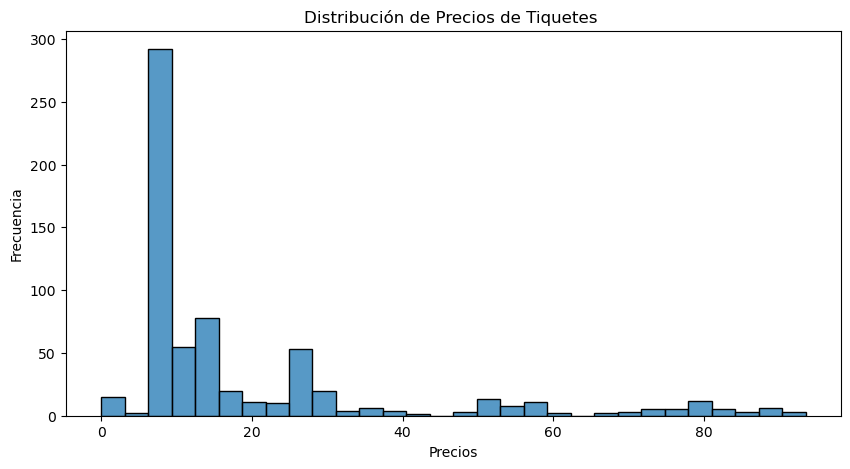

In [17]:
#Analisis de los precios de los tiquetes de los pasajeros
plt.figure(figsize=(10,5))
sns.histplot(df['Fare'], bins=30)
plt.title('Distribución de Precios de Tiquetes ')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')
plt.show()

**Observacion de los Precios de los tiquetes de los Pasajeros**: La distribucion de los precios de los tiquetes de los pasajeros va directamente relacionada a la clase a la que pertenecen, por lo que el precio de la mayoria de los tiquetes eran bajos y pertenecientes a la tercera clase.

<h2>Analisis Multivariado<h2>

<h3>Analisis Sobrevivientes y Edad<h3>

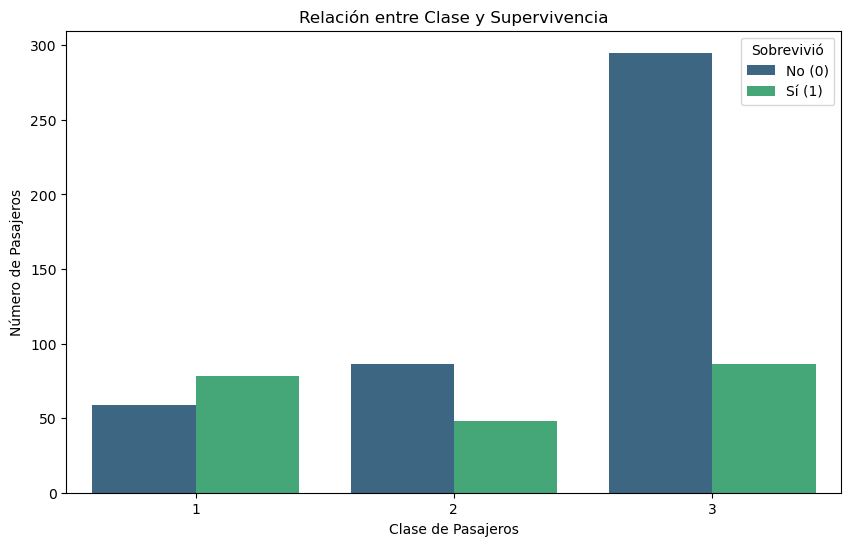

In [18]:
# Crear el gráfico de barras agrupado
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette="viridis")
plt.title('Relación entre Clase y Supervivencia')
plt.xlabel('Clase de Pasajeros')
plt.ylabel('Número de Pasajeros')
plt.legend(title='Sobrevivió', labels=['No (0)', 'Sí (1)'])  #
plt.show()


***La clase de los pasajeros ejerce una fuerte influencia en la supervivencia de los pasajeros***

<h3>Analisis Sobrevivientes y Genero<h3>

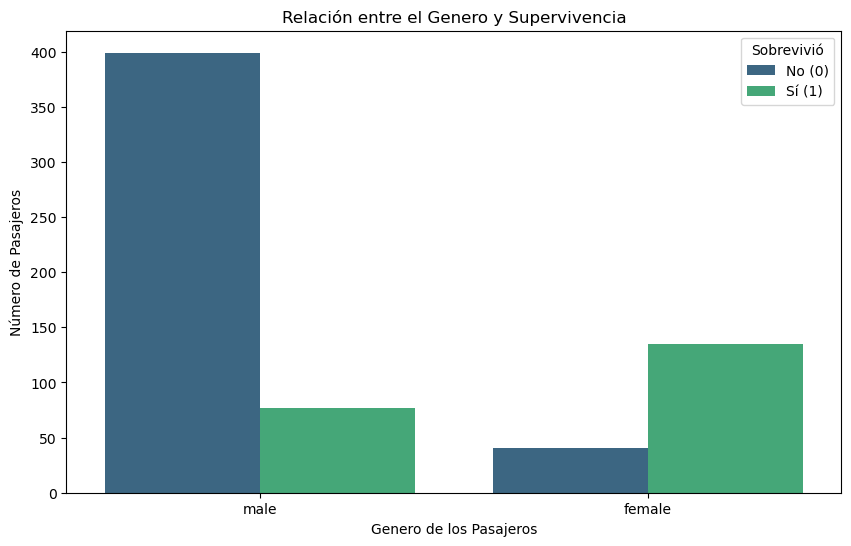

In [19]:

## Crear el gráfico de barras agrupado
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette="viridis")
plt.title('Relación entre el Genero y Supervivencia')
plt.xlabel('Genero de los Pasajeros')
plt.ylabel('Número de Pasajeros')
plt.legend(title='Sobrevivió', labels=['No (0)', 'Sí (1)']) 
plt.show()



Los generos de los Pasajeros influyó de manera directa en la supervivencia de los pasajeros, especialmente en el deceso de una gran cantidad de pasajeros masculinos y supervivencia de los femeninos.

**Existe relacion de aumento de precios entre ciertos datos**

<h2>Modelo de Regresion Logistica <h2>

Es importante determinar de antemano los tipos de datos de cada columna puesto que si son datos categoricos deben convertirse en numericos para que el modelo pueda interpretar los datos de la mejor manera.

<h3>Columnas Categoricas<h3>

In [20]:
for col  in columnas_categoricas:
    print(col)

Name
Sex
Ticket
Cabin
Embarked


Para la construcción del modelo de regresión lineal, seleccionaremos las variables categóricas que han mostrado correlación con el precio, asegurando que nuestro análisis se enfoque en los factores más influyentes, estas Variables son:  
**Sex**

<h3>Columnas Numericas<h3>

In [21]:
for col  in columnas_numericas:
    print(col)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


Además, para el desarrollo del modelo de regresión lineal, se elegirán las variables numéricas que han mostrado correlación con el precio. Las variables seleccionadas son:  
**Survived**  
**Pclass**  
**Age**  
**Fare**

<h3>Convertir Datos Categoricos a Numericos<h3>

Vamos a convertir **Sex** en columna numerica usando One-Hot-Enconding

In [22]:
df_encoded = pd.get_dummies(df, columns=['Sex'], drop_first=False)


# Guardar el DataFrame modificado
df.to_csv('archivo_modificado.csv', index=False)

#Convertir  a entero(1 o 0)
df_encoded['Sex_female'] = df_encoded['Sex_female'].astype(int)

#Verificamos la creacion de ambas Columnas
df_encoded.head()



,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,True


Para **Transmission** se usara **One-hot-Encoding** para convertir la transmision,la cual puede ser manual o automatica

<h3>Caracteristicas a usar en el Modelo<h3>

In [23]:
df_final=df_encoded[['Survived','Pclass','Age','Fare','Sex_female']]
df_final

,Survived,Pclass,Age,Fare,Sex_female
0,0,3,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0
...,...,...,...,...,...
884,0,3,25.0,7.0500,0
886,0,2,27.0,13.0000,0
887,1,1,19.0,30.0000,1
889,1,1,26.0,30.0000,0


<h3>Entrenamiento del Modelo<h3>

In [24]:
# Entrenar un modelo de regresión logística
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Reporte de clasificación
from sklearn.metrics import classification_report


# Definir las variables predictoras y la variable objetivo
X = df_final.drop('Survived', axis=1)
y = df_final['Survived']

# Normalizar y escalar los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=24)

# Crear un modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.77
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        90
           1       0.62      0.68      0.65        41

    accuracy                           0.77       131
   macro avg       0.74      0.75      0.74       131
weighted avg       0.78      0.77      0.77       131



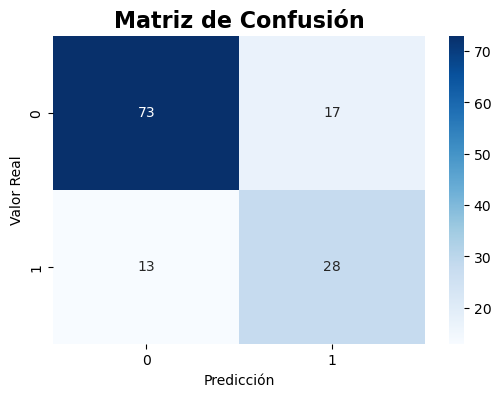

In [27]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión', fontsize=16, fontweight='bold')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5752\2023867300.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.coef_[0], y=X.columns, palette='viridis')


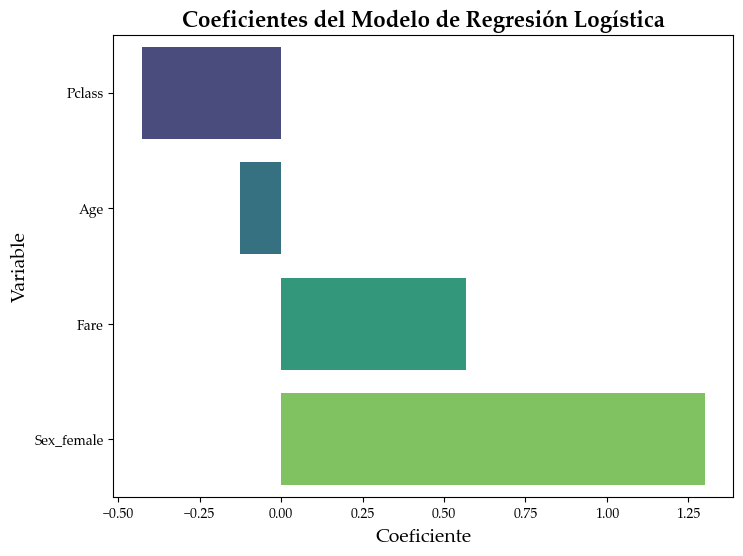

In [28]:
# Letra Palatino Linotype para todas las graficas
plt.rcParams['font.family'] = 'Palatino Linotype'

# Crear un gráfico de barras para visualizar los coeficientes del modelo
plt.figure(figsize=(8, 6))
sns.barplot(x=model.coef_[0], y=X.columns, palette='viridis')
plt.title('Coeficientes del Modelo de Regresión Logística', fontsize=16, fontweight='bold')
plt.xlabel('Coeficiente', fontsize=14)
plt.ylabel('Variable', fontsize=14)
plt.show()

<h3>Interpretacion y Analisis de Resultados<h3>

**Métricas del modelo para la clase "1" (sobrevivió):**

**Precisión:**
La precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo.
Aquí, la precisión para la clase "1" (sobrevivió) es 0.62, lo que significa que el 62% de las personas clasificadas como sobrevivientes realmente sobrevivieron.

**Recall (Sensibilidad):**
El recall mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos.
Aquí, el recall para la clase "1" (sobrevivió) es 0.68, lo que indica que el modelo identificó correctamente al 68% de todos los sobrevivientes.

**F1 Score:**
El F1-score es la media armónica de precisión y recall. Proporciona una métrica equilibrada para evaluar el desempeño del modelo, especialmente en casos de clases desbalanceadas.
Aquí, el F1-score para la clase "1" (sobrevivió) es 0.65, lo que refleja un equilibrio moderado entre precisión y recall.



**Matriz de Confusión (interpretación):**  

**Verdaderos negativos (Clase 0 predicha correctamente como no sobrevivió):**
El modelo clasificó correctamente 73 personas que no sobrevivieron al Titanic.

**Verdaderos positivos (Clase 1 predicha correctamente como sobrevivió):**
El modelo clasificó correctamente 28 personas que sobrevivieron al Titanic.

**Falsos positivos (Clase 0 clasificada incorrectamente como Clase 1):**
El modelo clasificó incorrectamente como sobrevivientes a 17 personas que no sobrevivieron.

**Falsos negativos (Clase 1 clasificada incorrectamente como Clase 0):**
El modelo clasificó incorrectamente como no sobrevivientes a 13 personas que realmente sobrevivieron.